df_feat.head         WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510  
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2

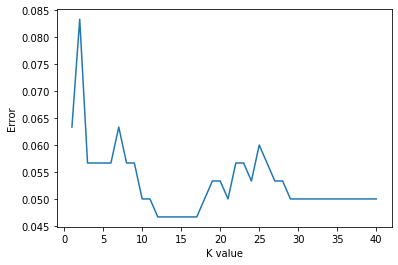

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [8]:
# %%
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# %%
# Impporting the dataset
df = pd.read_csv('Dataset_1.csv', index_col=0)

# %%
df.head(4)

# %%
# Standardizing the variables
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

# %%
print("df_feat.head", df_feat.head())

# %%
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, df['TARGET CLASS'], test_size=0.3, random_state=42)

# %%
error = []
k_value = []

for k in range(40):
    k_value.append(k+1)
    # %%
    # Using KNN
    knn = KNeighborsClassifier(n_neighbors=k+1)
    print(knn.fit(X_train, y_train))
    pred = knn.predict(X_test)

    error_ = 1 - accuracy_score(y_test, pred)
    error.append(error_)

    # %%
    # confusion_matrix_ = confusion_matrix(y_test, pred)
    # print(confusion_matrix_)
    # classification_report_ = classification_report(y_test, pred)
    # print(classification_report_)

# %%
plt.plot(k_value, error)
plt.xlabel('K value')
plt.ylabel('Error')
plt.show()

# %%
def performance_report(X_train, y_train, X_test, y_test, n_neighbors=3):
    '''
    performance_report()

    Arguments:
    X_train -- train features input
    y_train -- train output
    X_test -- test features input
    y_test -- test output
    n_neighbors -- default is 3

    Returns:
    dictionary -- keys = 'confusion_matrix', 'classification_report' 
    '''
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    print(knn)
    pred = knn.predict(X_test)

    confusion_matrix_ = confusion_matrix(y_test, pred)
    classification_report_ = classification_report(y_test, pred)
    return {
        'confusion_matrix': confusion_matrix_,
        'classification_report': classification_report_
    }

#%%
# to numpy
error_np = np.array(error)
k_value_np = np.array(k_value)

error_min_index = error_np.argmin().item() # numpy int to python int
k_value_ = k_value_np[error_min_index]

#%%
# for minimum error
performance_report_ = performance_report(X_train, y_train, X_test, y_test, n_neighbors=k_value_)
print('For k = {}: \n {}{}'.format(k_value_, performance_report_['confusion_matrix'], performance_report_['classification_report']))

# %%
